# Model Conditional Curve 

In [2]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze' 
mask_filenames = []
cope_files = []
for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)
    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/old/model_cond_curve/' 
                          + SID + '/fixedfx/cope_curve*')
    subjcopes_glob.sort()
    cope_files.append(subjcopes_glob)    
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 3:
        print(SID)

## Cell to double-check the array indexing

In [3]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_filenames[0]):
    print(i, mask_filenames[0][i].split('/')[-1][:-7])

(0, 'lh-hippocampus_warped')
(1, 'lh_caudate_anat_mask_warped')
(2, 'rh_caudate_anat_mask_warped')
(3, 'lh-dmPFC_warped')
(4, 'lh-mPFC_lausanne_warped')
(5, 'lh-mPFC_fs_warped')
(6, 'lh-motor_warped')
(7, 'lh-mPFC_fs-3reg_warped')
(8, 'rh-hippocampus_warped')
(9, 'rh-dmPFC_warped')
(10, 'rh-mPFC_lausanne_warped')
(11, 'rh-mPFC_fs_warped')
(12, 'rh-motor_warped')
(13, 'rh-mPFC_fs-3reg_warped')
(14, 'lh-putamen_warped')
(15, 'rh-putamen_warped')


In [16]:
for i, curr_cope in enumerate(cope_files[0]):
    print(i, cope_files[0][i].split('/')[-1][5:-7]) 

(0, 'curve_bin1')
(1, 'curve_bin2')
(2, 'curve_bin3')


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [55]:
all_data = {'subjid':[],
            'lhhp_bin1':[], 'rhhp_bin1':[], 'lhhp_bin2':[], 'rhhp_bin2':[], 'lhhp_bin3':[], 'rhhp_bin3':[],
            'lhmpfc_bin1':[], 'rhmpfc_bin1':[], 'lhmpfc_bin2':[], 'rhmpfc_bin2':[], 'lhmpfc_bin3':[], 'rhmpfc_bin3':[],
            'lhcaud_bin1':[], 'rhcaud_bin1':[], 'lhcaud_bin2':[], 'rhcaud_bin2':[], 'lhcaud_bin3':[], 'rhcaud_bin3':[],
            'lhput_bin1':[], 'rhput_bin1':[], 'lhput_bin2':[], 'rhput_bin2':[], 'lhput_bin3':[], 'rhput_bin3':[]}

for i in range(len(sids)):
    all_data['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][8])
    lh_mpfc_img = nb.load(mask_filenames[i][5])
    rh_mpfc_img = nb.load(mask_filenames[i][11])
    lh_caud_img = nb.load(mask_filenames[i][1])
    rh_caud_img = nb.load(mask_filenames[i][2])
    lh_put_img = nb.load(mask_filenames[i][14])
    rh_put_img = nb.load(mask_filenames[i][15])
    
    bin1_img = nb.load(cope_files[i][0])
    bin2_img = nb.load(cope_files[i][1])
    bin3_img = nb.load(cope_files[i][2])

    region = ['hp', 'mpfc', 'caud', 'put']
    learn_bin = ['bin1', 'bin2', 'bin3']
   
    for r in region:
        for l in learn_bin:
            lh_data = eval('{0}_img.get_data()[lh_{1}_img.get_data() > 0.]'.format(l,r))
            all_data['lh{0}_{1}'.format(r,l)].append(np.mean(lh_data))            
            rh_data = eval('{0}_img.get_data()[rh_{1}_img.get_data() > 0.]'.format(l,r))
            all_data['rh{0}_{1}'.format(r,l)].append(np.mean(rh_data))

all_data_df = pd.DataFrame(all_data)    

### Combine the two hemispheres to create one regional average

In [56]:
region = ['hp', 'mpfc', 'caud', 'put']
learn_bin = ['bin1', 'bin2', 'bin3']
plot = {}
for r in region:
    for l in learn_bin:
        all_data_df['{0}_all_{1}'.format(r,l)] = (all_data_df['lh{0}_{1}'.format(r,l)] 
                                                  + all_data_df['rh{0}_{1}'.format(r,l)])/2.
        plot['{0}_{1}'.format(r,l)] = all_data_df['{0}_all_{1}'.format(r,l)]
plot_df = pd.DataFrame.from_dict(plot)

## Hippocampus

In [57]:
hp_chart = {}
for x in ['bin1', 'bin2', 'bin3']:
    hp_chart['{0}'.format(x)] = all_data_df['hp_all_{0}'.format(x)] 
hp_chart_df = pd.DataFrame.from_dict(hp_chart)

In [ ]:
hp_chart_df

Mean bin1:  -1.363941985
STD bin1:  2.09351256269

Mean bin2:  -1.08889696491
STD bin2:  2.40329736257

Mean bin3:  -0.748854875565
STD bin3:  2.35451148305

Bin1 vs. Bin3:  Ttest_relResult(statistic=-2.3670255513655296, pvalue=0.028703319982908513)


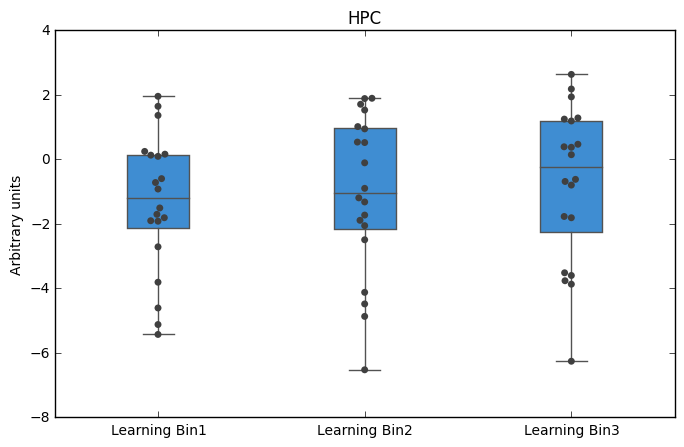

In [58]:
for d in ['bin1', 'bin2', 'bin3']:
    print "Mean {0}: ".format(d), np.mean(hp_chart['{0}'.format(d)])
    print "STD {0}: ".format(d), np.std(hp_chart['{0}'.format(d)])
    print ""
print "Bin1 vs. Bin3: ", stats.ttest_rel(hp_chart['bin1'], hp_chart['bin3'])
N = 3
conditions = ['Learning Bin1', 'Learning Bin2', 'Learning Bin3']
hp_allsubjs = [hp_chart['bin1'], hp_chart['bin2'], hp_chart['bin3']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("HPC")
plt.show()

## mPFC

In [59]:
mpfc_chart = {}
for x in ['bin1', 'bin2', 'bin3']:
    mpfc_chart['{0}'.format(x)] = all_data_df['mpfc_all_{0}'.format(x)] 
mpfc_chart_df = pd.DataFrame.from_dict(mpfc_chart)

In [60]:
mpfc_chart_df

,bin1,bin2,bin3
0,0.065771,3.092899,2.558825
1,-3.589852,-3.654166,-3.530211
2,0.851871,-0.296773,-2.043519
3,0.127769,0.972959,-0.245714
4,-2.799586,-2.713010,-1.529015
5,2.957663,0.364324,3.299010
6,0.821516,1.570432,2.006929
7,-3.678367,-6.179242,-5.696481
8,-6.713032,-8.675179,-6.652923
9,-1.456021,-0.792126,0.646130


Mean bin1:  -0.995982504543
STD bin1:  2.78659754811

Mean bin2:  -0.970614974201
STD bin2:  3.21101390377

Mean bin3:  -0.57281544134
STD bin3:  3.16548633296

Bin1 vs. Bin3:  Ttest_relResult(statistic=-1.3957341157338088, pvalue=0.1788928774878244)


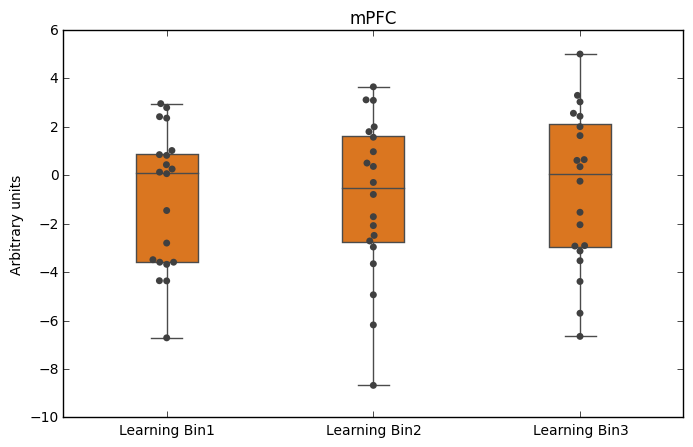

In [61]:
for d in ['bin1', 'bin2', 'bin3']:
    print "Mean {0}: ".format(d), np.mean(mpfc_chart['{0}'.format(d)])
    print "STD {0}: ".format(d), np.std(mpfc_chart['{0}'.format(d)])
    print ""
print "Bin1 vs. Bin3: ", stats.ttest_rel(mpfc_chart['bin1'], mpfc_chart['bin3'])
N = 3
conditions = ['Learning Bin1', 'Learning Bin2', 'Learning Bin3']
mpfc_allsubjs = [mpfc_chart['bin1'], mpfc_chart['bin2'], mpfc_chart['bin3']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#f97401", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("mPFC")
plt.show()

## Caudate

In [62]:
caud_chart = {}
for x in ['bin1', 'bin2', 'bin3']:
    caud_chart['{0}'.format(x)] = all_data_df['caud_all_{0}'.format(x)] 
caud_chart_df = pd.DataFrame.from_dict(caud_chart)

In [ ]:
caud_chart_df

Mean bin1:  2.13520215005
STD bin1:  2.08103732683

Mean bin2:  1.27767074071
STD bin2:  2.63078846221

Mean bin3:  1.01845246395
STD bin3:  2.13043013506

Bin1 vs. Bin2:  Ttest_relResult(statistic=2.1031119602812232, pvalue=0.049011307951048251)
Bin1 vs. Bin3:  Ttest_relResult(statistic=3.1849870713790351, pvalue=0.0048754791078185209) **


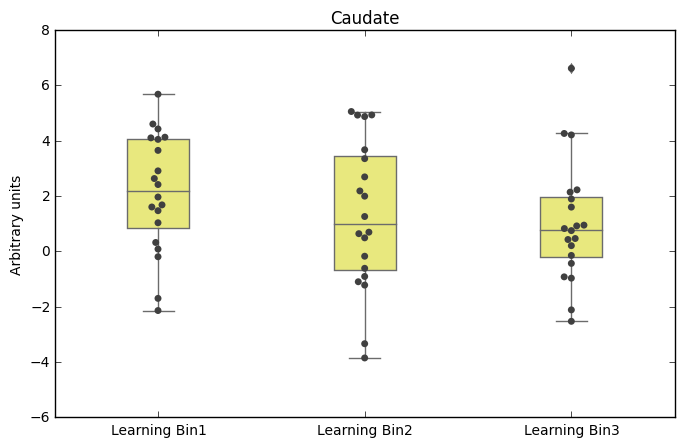

In [63]:
for d in ['bin1', 'bin2', 'bin3']:
    print "Mean {0}: ".format(d), np.mean(caud_chart['{0}'.format(d)])
    print "STD {0}: ".format(d), np.std(caud_chart['{0}'.format(d)])
    print ""
print "Bin1 vs. Bin2: ", stats.ttest_rel(caud_chart['bin1'], caud_chart['bin2'])
print "Bin1 vs. Bin3: ", stats.ttest_rel(caud_chart['bin1'], caud_chart['bin3']), "**"
N = 3
conditions = ['Learning Bin1', 'Learning Bin2', 'Learning Bin3']
caud_allsubjs = [caud_chart['bin1'], caud_chart['bin2'], caud_chart['bin3']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate")
plt.show()

## Putamen

In [49]:
put_chart = {}
for x in ['bin1', 'bin2', 'bin3']:
    put_chart['{0}'.format(x)] = all_data_df['put_all_{0}'.format(x)] 
put_chart_df = pd.DataFrame.from_dict(put_chart)

In [ ]:
put_chart_df

Mean bin1:  0.337153174356
STD bin1:  1.95348194947

Mean bin2:  0.180644585378
STD bin2:  2.14067506238

Mean bin3:  0.439891786501
STD bin3:  2.28450291688



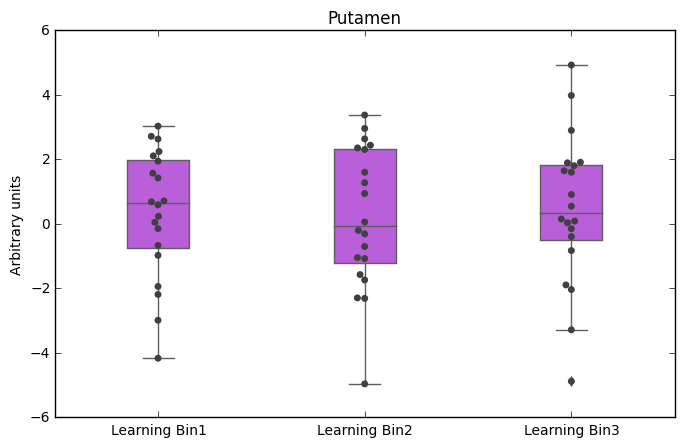

In [50]:
for d in ['bin1', 'bin2', 'bin3']:
    print "Mean {0}: ".format(d), np.mean(put_chart['{0}'.format(d)])
    print "STD {0}: ".format(d), np.std(put_chart['{0}'.format(d)])
    print ""
N = 3
conditions = ['Learning Bin1', 'Learning Bin2', 'Learning Bin3']
put_allsubjs = [put_chart['bin1'], put_chart['bin2'],  put_chart['bin3']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (8,5))
ax0 = sns.boxplot(data = put_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = put_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen")
plt.show()